<a href="https://colab.research.google.com/github/huynhthientung/CS114.L21.KHCL/blob/thanh%2Fpredict_final_0606/NBCNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scrape từ trang NBC News: https://www.nbcnews.com/

Tờ báo này có phân loại các headline theo năm tại: https://www.nbcnews.com/archive/
Nên nhóm sẽ scrape tại đây.

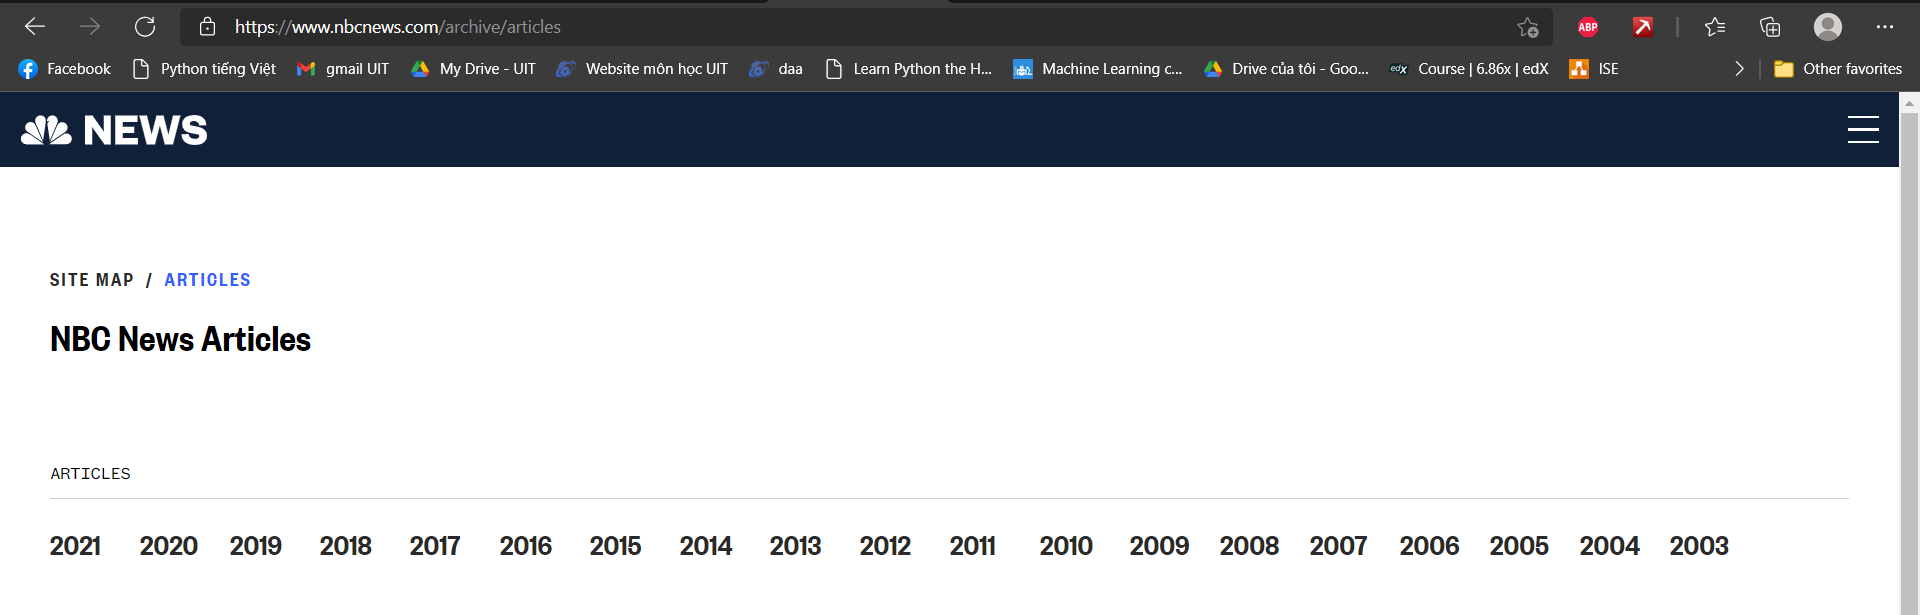

Xem xét website trên:
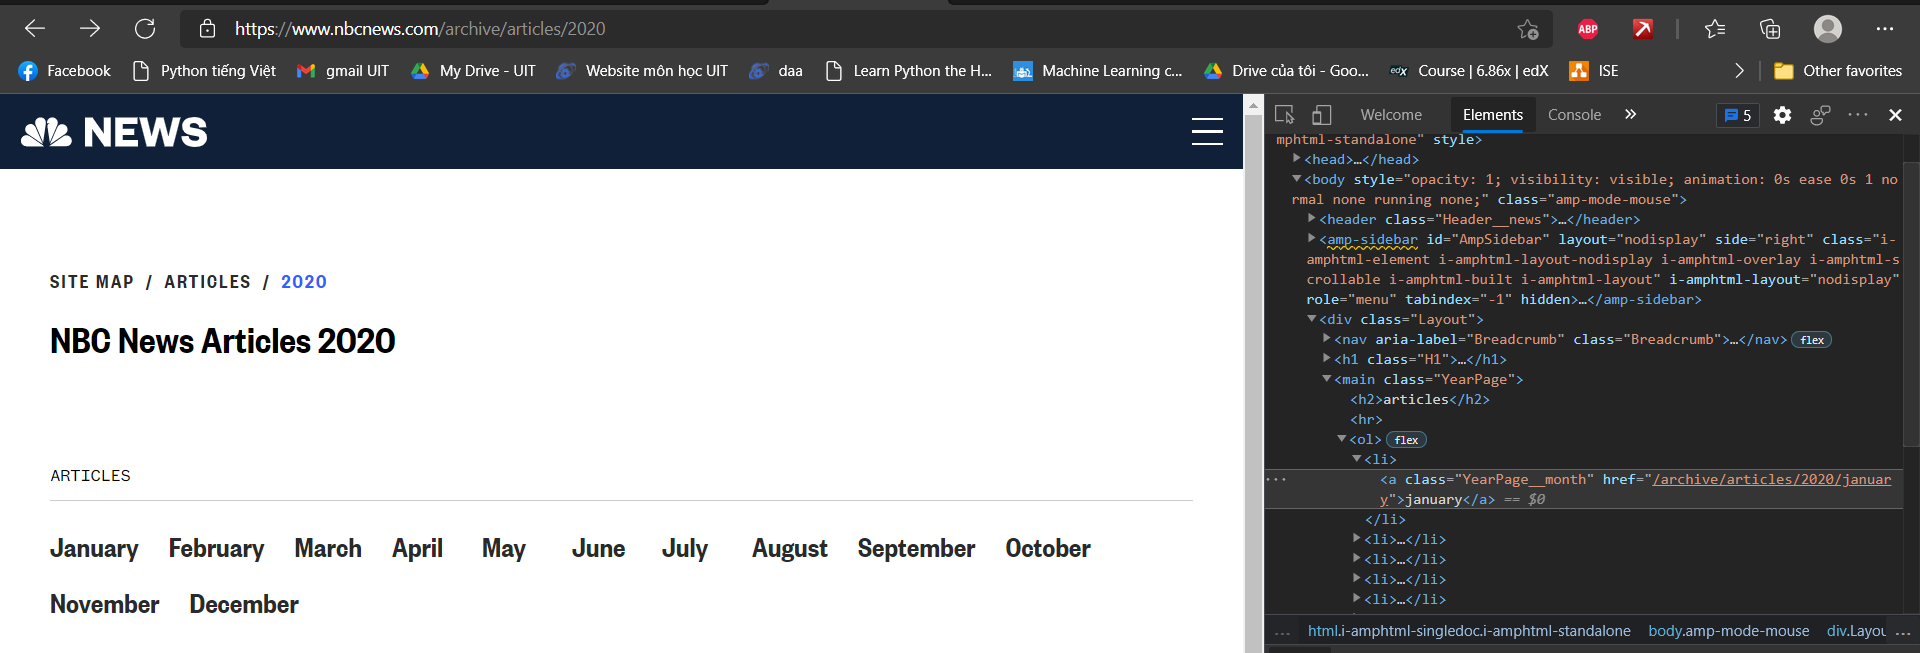

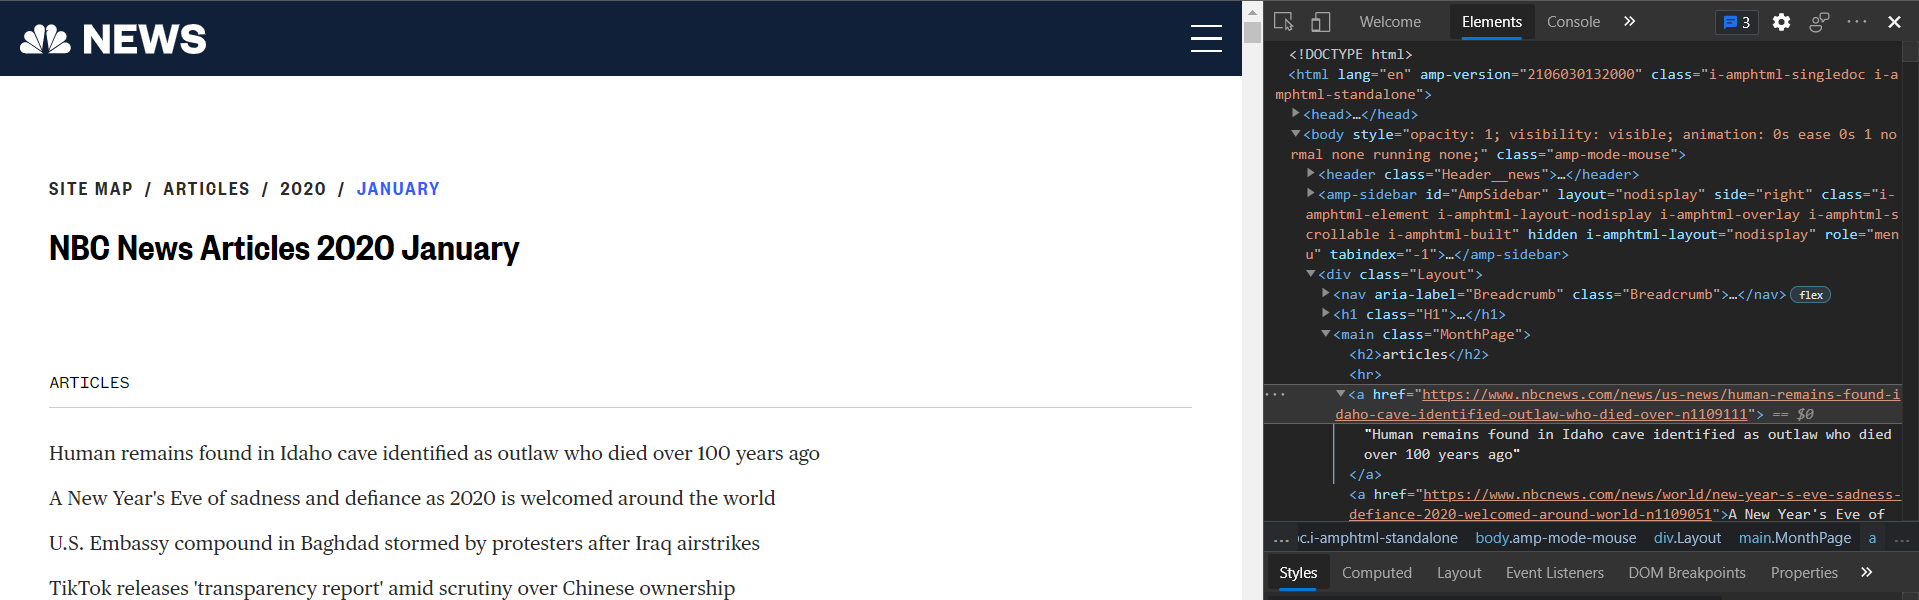

Import các thư viện cần thiết

In [61]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm # để theo dõi tiến trình
import json

In [62]:
data = {}
data['root'] = []

def getData(URL):
  count = 0;
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, 'html.parser')
  getMonth = soup.find("main", class_ = "MonthPage")
  Month = getMonth.findAll("a")
  for i in Month:
    data['root'].append({
            'is_sarcastic': 0,
            'headline': i.text,
            'article_link': i.get("href")})
    count+= 1
  return count


Cho chạy từng trang theo từng tháng/năm

In [63]:
arr_url =[]
month =  ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october','november','december',]
def sendRequest(year, month):
  count = 0
  for i in range(1,3): # Vì mỗi năm được chia làm 2 trang: 6 tháng đầu và 6 tháng sau
    if (i==1):
      url = 'https://www.nbcnews.com/archive/articles/' + str(year) + '/' + month
    if (i==2):
      url = 'https://www.nbcnews.com/archive/articles/' + str(year) + '/' + month + '/' + str(i)
    arr_url.append(url)
    count += getData(url)
  return count


Crawl...

In [64]:
# crawl

count = 0
for year in tqdm(range(2019,2021), desc = 'year'):
  for m in month:
    count+= sendRequest(year,m)
for m in range(5):
  count+= sendRequest(2021,month[m])
print("Crawled:", count)


Crawled: 49609


Ghi file json

In [65]:
with open('NBCNews.json', 'w') as f:
    json.dump(data, f, indent=3)
print('Done')

Done
